# Guía 7 - Ejercicio 5_3
En este ejercico se cargan las imágenes con ruido, se aplican como pre-procesamientos filtros de reducción de ruido, utilizando finalmente el alfa media recortado. Luego se aplica un canny para detección de bordes y, posteriormente se usa la transformada de Hough líneas para dibujar las líneas detectadas de color rojo

In [7]:
import cv2 as cv
import numpy as np
from scipy.ndimage import generic_filter
import matplotlib.pyplot as plt

def mediana_filtro(image, kernel_size):
    return cv.medianBlur(image, kernel_size)

# 2. Filtro del punto medio
def punto_medio_filtro(image, kernel_size):
    def midpoint(values):
        return (np.min(values) + np.max(values)) / 2
    
    return generic_filter(image, midpoint, size=kernel_size)

# 3. Filtro de media-alfa recortado
def media_alfa_recortado_filtro(image, kernel_size, d):
    def alpha_trimmed_mean(values):
        values = np.sort(values)
        trimmed_values = values[d//2:-d//2]
        return np.mean(trimmed_values)
    
    return generic_filter(image, alpha_trimmed_mean, size=kernel_size)

In [8]:
imagen = cv.imread("Imagenes/iguazu_ruidogris.jpg", cv.IMREAD_GRAYSCALE)

kernel = 3
d = 2
imagen_limpia = media_alfa_recortado_filtro(imagen, kernel, d)

edges = cv.Canny(imagen_limpia, 72, 202)

lines = cv.HoughLinesP(edges, 1, np.pi / 180, threshold=86, minLineLength=80, maxLineGap=10)

imagen_final = cv.cvtColor(imagen_limpia, cv.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(imagen_final, (x1, y1), (x2, y2), (255, 0, 0), 2)


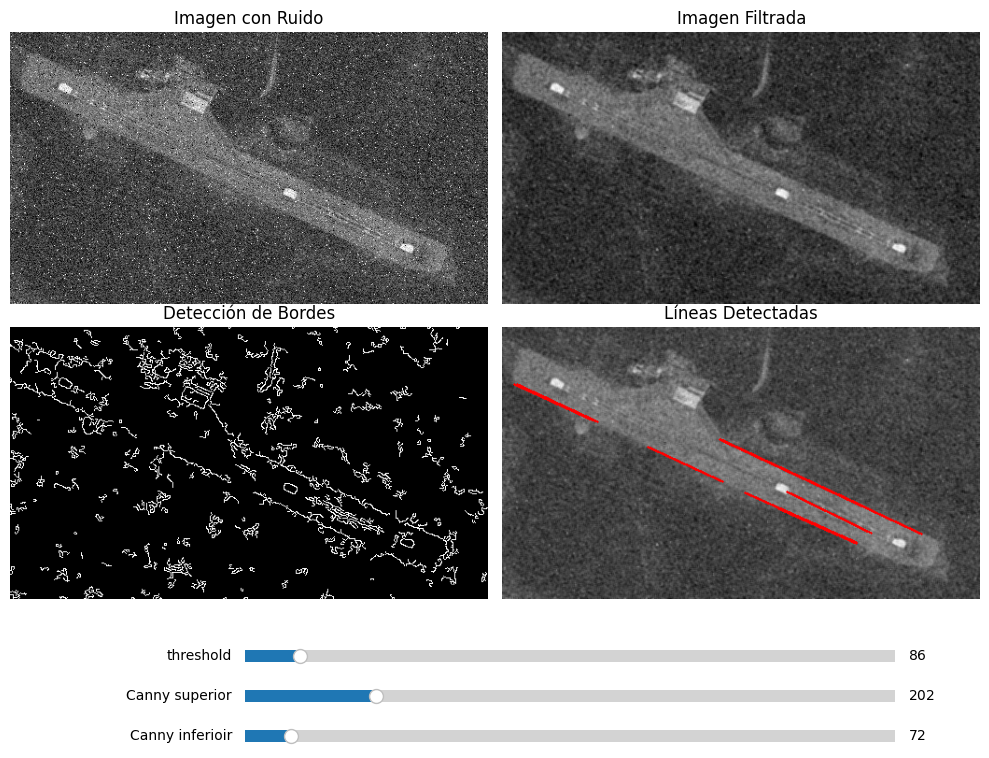

In [9]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen con Ruido')
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(imagen_limpia, cmap='gray')
plt.title('Imagen Filtrada')
plt.axis("off")
plt.subplot(2, 2, 3)
fig_bordes = plt.imshow(edges, cmap='gray')
plt.title('Detección de Bordes')
plt.axis("off")
plt.subplot(2, 2, 4)
fig_final = plt.imshow(imagen_final)
plt.title('Líneas Detectadas')
plt.axis("off")
plt.tight_layout()

def update_valor(value):
    canny_inferioir = valor_slider.val
    canny_superior = valor_slider2.val
    threshold = valor_slider3.val
    imagen_bordes = cv.Canny(imagen_limpia,canny_inferioir,canny_superior)
    

    # Detección de líneas usando la Transformada de Hough
    imagen_lineas = cv.HoughLinesP(imagen_bordes, 1, np.pi / 180, threshold, minLineLength=50, maxLineGap=10)

    # Dibujar las líneas detectadas sobre la imagen original
    imagen_final = cv.cvtColor(imagen_limpia, cv.COLOR_GRAY2BGR)
    if imagen_lineas is not None:
        for line in imagen_lineas:
            x1, y1, x2, y2 = line[0]
            cv.line(imagen_final, (x1, y1), (x2, y2), (255, 0, 0), 2)

    fig_bordes.set_data(imagen_bordes)
    fig_final.set_data(imagen_final)

    plt.draw()
    
plt.subplots_adjust(bottom=0.20)
ax_filtro = plt.axes([0.25, 0.05, 0.65, 0.03])
valor_slider = plt.Slider(ax_filtro, 'Canny inferioir', 1, 1000, valinit=72, valstep=1)
valor_slider.on_changed(update_valor)

ax_filtro = plt.axes([0.25, 0.10, 0.65, 0.03])
valor_slider2 = plt.Slider(ax_filtro, 'Canny superior', 1, 1000, valinit=202, valstep=1)
valor_slider2.on_changed(update_valor)

ax_filtro = plt.axes([0.25, 0.15, 0.65, 0.03])
valor_slider3 = plt.Slider(ax_filtro, 'threshold', 1, 1000, valinit=86, valstep=1)
valor_slider3.on_changed(update_valor)



plt.show()

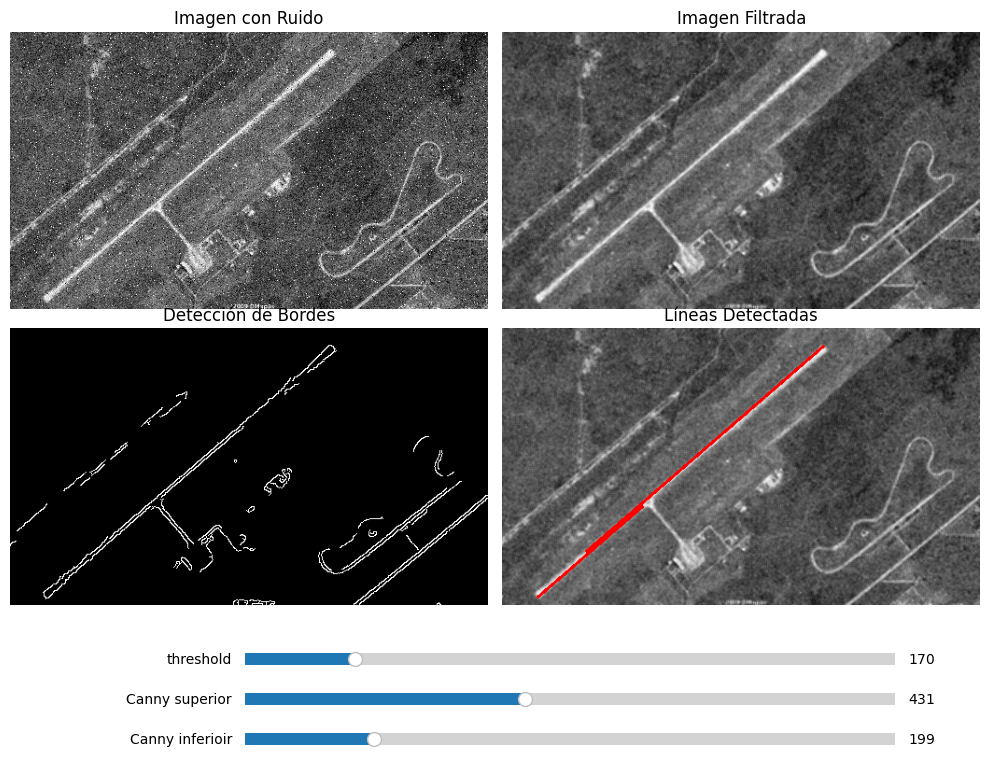

In [10]:
imagen = cv.imread("Imagenes/corrientes_ruidogris.jpg", cv.IMREAD_GRAYSCALE)

# Filtrado de la imagen
kernel = 3
d = 2
imagen_limpia = media_alfa_recortado_filtro(imagen, kernel, d)

edges = cv.Canny(imagen_limpia, 199, 431)

# Detección de líneas usando la Transformada de Hough
lines = cv.HoughLinesP(edges, 1, np.pi / 180, threshold=170, minLineLength=80, maxLineGap=10)

# Dibujar las líneas detectadas sobre la imagen original
imagen_final = cv.cvtColor(imagen_limpia, cv.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(imagen_final, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen con Ruido')
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(imagen_limpia, cmap='gray')
plt.title('Imagen Filtrada')
plt.axis("off")
plt.subplot(2, 2, 3)
fig_bordes = plt.imshow(edges, cmap='gray')
plt.title('Detección de Bordes')
plt.axis("off")
plt.subplot(2, 2, 4)
fig_final = plt.imshow(imagen_final)
plt.title('Líneas Detectadas')
plt.axis("off")
plt.tight_layout()

plt.subplots_adjust(bottom=0.20)
ax_filtro = plt.axes([0.25, 0.05, 0.65, 0.03])
valor_slider = plt.Slider(ax_filtro, 'Canny inferioir', 1, 1000, valinit=199, valstep=1)
valor_slider.on_changed(update_valor)

ax_filtro = plt.axes([0.25, 0.10, 0.65, 0.03])
valor_slider2 = plt.Slider(ax_filtro, 'Canny superior', 1, 1000, valinit=431, valstep=1)
valor_slider2.on_changed(update_valor)

ax_filtro = plt.axes([0.25, 0.15, 0.65, 0.03])
valor_slider3 = plt.Slider(ax_filtro, 'threshold', 1, 1000, valinit=170, valstep=1)
valor_slider3.on_changed(update_valor)


plt.show()